**Bande interdite**

La bande interdite d'énergie à une largeur de 3.3392 eV.
La bande interdite est indirecte.
La transition dans la bande interdite est de type \Gamma-K .


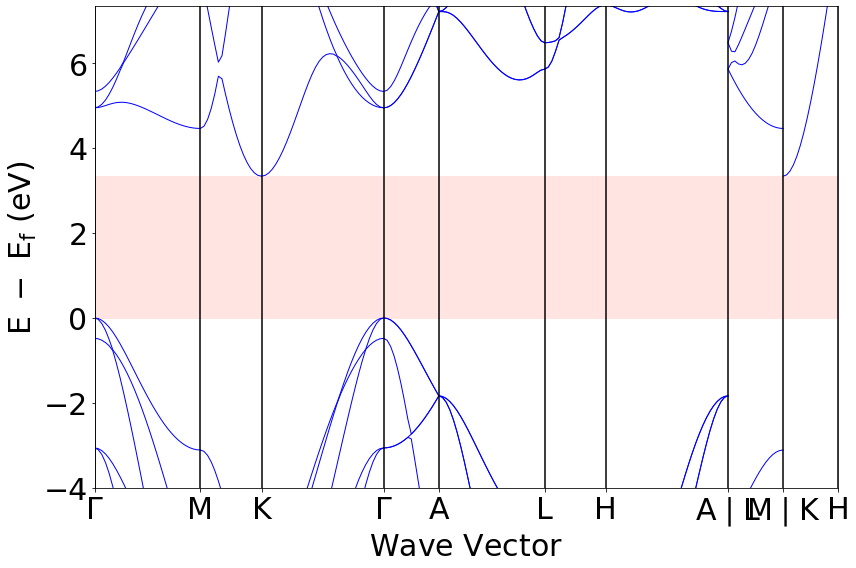

In [232]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.electronic_structure.bandstructure import BandStructure
from pymatgen.electronic_structure.plotter import BSPlotter
import matplotlib.pyplot as plt
from scipy import constants as cst
import numpy as np
from IPython.display import Markdown,display
def printbold(string): 
    display(Markdown(string))

with MPRester("gsItyjn65HPAFPdGywpu") as m:
    structure = m.get_bandstructure_by_material_id("mp-47")

bandgap = structure.get_band_gap()
plot = BSPlotter(structure)
data = plot.bs_plot_data()
nbre = structure.nb_bands
#print(nbre)
#energy0v[i] = (data.get("energy")[i].get[14])[0]
#print(energy0v)

 
# Affichage de la bande interdite

printbold("**Bande interdite**")
print("La bande interdite d'énergie à une largeur de", str(bandgap['energy']), "eV et est indirecte.")
print("La transition dans la bande interdite est de type",str(bandgap['transition']), ".")
plot.get_plot()
plt.fill_between(np.linspace(data['ticks']['distance'][0], data['ticks']['distance'][-1], 500), 0, bandgap['energy'], color = 'mistyrose')



**Dispersions maximales et minimales de la dernière bande de valence et de la première bande de conduction**

Pour trouver les dispersions minimales et maximales, on doit trouver les pentes correspondant à chaque branche et en
déduire quelles sont les bandes où les pentes sont minimales et maximales en valeur absolue.
Pour ce matériau, la dernière bande de valence est la 7e bande tandis que la première bande de conduction est la 8e.


**1. Dernière bande de valence**

Après calcul, on obtient un vecteur renvoyant les pentes à chaque branche qui est :
[-2.15583299 -4.61006923  4.17204102 -2.44341601 -2.0431192   0.62335528
  1.45771553  2.22686531  3.57821092]
On observe ensuite que le minimum en valeur absolue est 0.6233552751551013 , ce qui correspond à la 6e branche.
On en tire de la même manière que le maximum en valeur absolue est 4.6100692341595755 ce qui correspond à la 2e 
branche.


**2. Première bande de conduction**

Après calcul, on obtient un vecteur renvoyant les pentes à chaque branche qui est :
[-0.33696364 -1.3491832   0.96641074  3.01760147 -0.939397    1.81834954
 -0.09563315 -1.86017988  5.37370509]
On observe ensuite que le minimum en valeur absolue est 0.09563314657013286 , ce qui correspond à la 7e branche.
On en tire de la même manière que le maximum en valeur absolue est 5.373705090476891 ce qui correspond à la 9e 
branche.
Les dispersions maximales sont indiquées par des flèches rouges tandis que les dispersions minimales sont indiquées
par des flèches vertes.


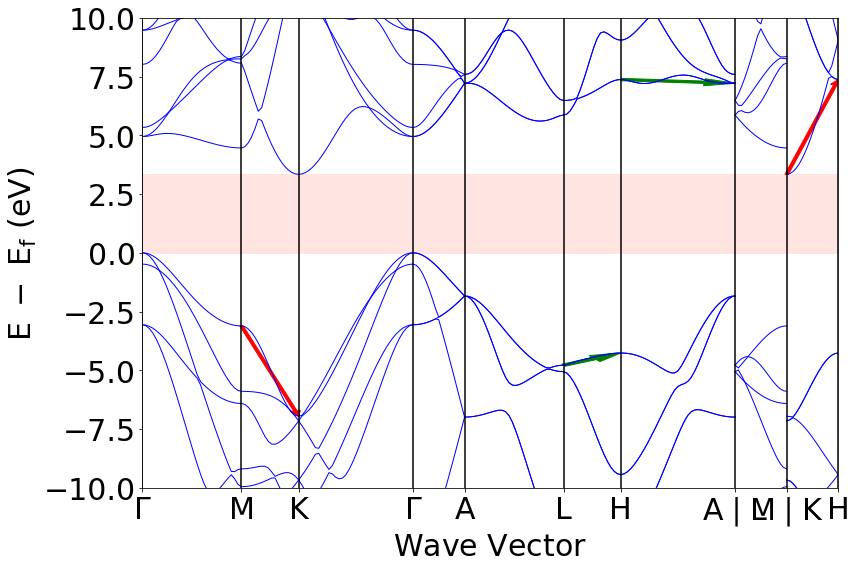

In [236]:
#print(data.get('energy')[6].get('1')[7]) # 7 est ma bande de valence
#print((data.get('energy')[0].get('1'))[8]) # 8 est ma bande de conduction
printbold("**Dispersions maximales et minimales de la dernière bande de valence et de la première bande de conduction**")
print("Pour trouver les dispersions minimales et maximales, on doit trouver les pentes correspondant à chaque branche et en")
print("déduire quelles sont les bandes où les pentes sont minimales et maximales en valeur absolue.")
print("Pour ce matériau, la dernière bande de valence est la 7e bande tandis que la première bande de conduction est la 8e.")


printbold("**1. Dernière bande de valence**")
# calcul des pentes pour la bande de valence
energy0v = np.zeros(9)
energyfv = np.zeros(9)
penteV = np.zeros(9)
distance = data.get('ticks').get('distance')
distancenew = distance
for i in range(1, 8) :
    if distancenew[i] == distancenew[i-1] :
        del distancenew[i]
#print(distanceVnew)        
for i in range(0, 9) : 
    energy0v[i] = (data.get('energy')[i].get('1')[7])[0]
    energyfv[i] = (data.get('energy')[i].get('1')[7])[-1]
    penteV[i] = (energyfv[i] - energy0v[i])/(distancenew[i+1]-distancenew[i])
#print(energy0v)
#print(energyfv)
print("Après calcul, on obtient un vecteur renvoyant les pentes à chaque branche qui est :")
print(penteV)
print("On observe ensuite que le minimum en valeur absolue est", min(abs(penteV)),", ce qui correspond à la 6e branche.")
print("On en tire de la même manière que le maximum en valeur absolue est", max(abs(penteV)),"ce qui correspond à la 2e ")
print("branche.")


printbold("**2. Première bande de conduction**")
#calcul des pentes pour la bande de conduction
energy0c = np.zeros(9)
energyfc = np.zeros(9)
penteC = np.zeros(9)
for i in range(0,9) :
    energy0c[i] = (data.get('energy')[i].get('1')[8])[0]
    energyfc[i] = (data.get('energy')[i].get('1')[8])[-1]
    penteC[i] = (energyfc[i]-energy0c[i])/(distancenew[i+1]-distancenew[i])

print("Après calcul, on obtient un vecteur renvoyant les pentes à chaque branche qui est :")
print(penteC)
print("On observe ensuite que le minimum en valeur absolue est", min(abs(penteC)),", ce qui correspond à la 7e branche.")
print("On en tire de la même manière que le maximum en valeur absolue est", max(abs(penteC)),"ce qui correspond à la 9e ")
print("branche.")
plot.get_plot(ylim = [-10, 10])
plt.arrow(distance[6], energy0c[6], distance[7]-distance[6], energyfc[6]-energy0c[6], color ='green', width = 0.1, length_includes_head = True)
plt.arrow(distance[8], energy0c[8], distance[9]-distance[8], energyfc[8]-energy0c[8], color = 'r', width = 0.05, length_includes_head = True)
plt.arrow(distance[5], energy0v[5], distance[6]-distance[5], energyfv[5]-energy0v[5], color = 'green', width = 0.1, length_includes_head = True)
plt.arrow(distance[1], energy0v[1], distance[2]-distance[1], energyfv[1]-energy0v[1], color = 'r', width = 0.05, length_includes_head = True)
plt.fill_between(np.linspace(data['ticks']['distance'][0], data['ticks']['distance'][-1], 500), 0, bandgap['energy'], color = 'mistyrose')
print("Les dispersions maximales sont indiquées par des flèches rouges tandis que les dispersions minimales sont indiquées")
print("par des flèches vertes.")

In [237]:

printbold("**Masse effective**")

print("La masse effective peut être calculée au moyen de l'expression suivante :")



**Masse effective**

La masse effective peut être calculée au moyen de l'expression suivante :


![](masse_eff.png)

On a donc besoin de l'expression de l'énergie au niveau des optima pour lesquels on cherche la masse effective.
On procède en interpolant la courbe aux alentours des optima. En obtenant une équation de forme parabolique,
la dérivée seconde de l'énergie par rapport au vecteur d'onde k revient simplement au double du coefficient de 
la puissance la plus haute du polynome d'interpolation.


**1. Masse effective aux maxima de la dernière bande de valence**

Le premier maximum de la dernière bande de valence se trouve au début de la première branche.
En utilisant une interpolation de degré deux, on obtient une parabole qui colle bien au graphe au voisinage du
1er maximum dont l'équation est : -5.670890288516421 k^2 + -0.00502258701141514 k + -3.8496811592639706e-18 .
La masse effective au premier maximum est donc -9.805530190079411e-70 [kg].


Le second maximum de la dernière bande de valence se trouve entre la 3e et la 4e branche.
En utilisant une interpolation de degré deux, on obtient une parabole qui colle bien au graphe au voisinage du
2e maximum dont l'équation est : -5.660992095596714 k^2 + 44.65605828018754 k + -88.06599051918076 .
La masse effective au second maximum est donc -9.822675069963084e-70 [kg].


Les masses effectives sont quasi identiques, en réalité elles devraient l'être mais l'imprécision est due à 
l'imprécision apportée par l'interpolation


**2. Masse effective aux minima de la première bande de conduction**

Le premier minimum de la première bande de conduction se trouve entre la 2e et la 3e branche.
En utilisant une interpolation de degré deux, on obtient une parabole qui colle bien au graphe au voisinage du
1er minimum dont l'équation est : 8.155568449310909 k^2 + -37.14490311398328 k + 45.63352143979173 .
La masse effective au second maximum est donc 6.818174143750122e-70 [kg].


Le second minimum de la première bande de conduction se trouve entre la 8e et la 9e branche.
En utilisant une interpolation de degré deux, on obtient une parabole qui colle bien au graphe au voisinage du
2e minimum dont l'équation est : 11.398206641359236 k^2 + -213.84667699012516 k + 1006.3542491069256 .
La masse effective au second maximum est donc 4.878494282329039e-70 [kg].


Ici, les masses effectives sont moins proches qu'à l'étape précédente mais restent cependant bien du même ordre de 
grandeur. Cette plus grande erreur est due au fait que l'interpolation parabolique est moins bonne dans ce cas-ci.


Le

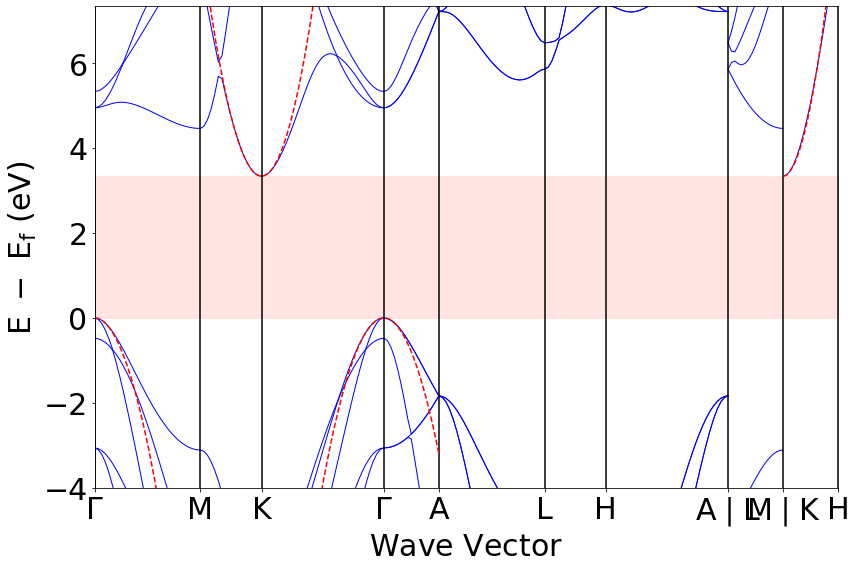

In [239]:
print("On a donc besoin de l'expression de l'énergie au niveau des optima pour lesquels on cherche la masse effective.")
print("On procède en interpolant la courbe aux alentours des optima. En obtenant une équation de forme parabolique,")
print("la dérivée seconde de l'énergie par rapport au vecteur d'onde k revient simplement au double du coefficient de ")
print("la puissance la plus haute du polynome d'interpolation.")

printbold("**1. Masse effective aux maxima de la dernière bande de valence**")

print("Le premier maximum de la dernière bande de valence se trouve au début de la première branche.")
energymax1 = data.get('energy')[0].get('1')[7]
distancemax1 = data.get('distances')[0]
plot.get_plot()
plt.fill_between(np.linspace(data['ticks']['distance'][0], data['ticks']['distance'][-1], 500), 0, bandgap['energy'], color = 'mistyrose')

interpmax1 = np.polyfit([distancemax1[0], distancemax1[1], distancemax1[2]],[energymax1[0],energymax1[1], energymax1[2]], 2)
xmax1 = np.linspace(distancemax1[0], distancemax1[-1], 50)
ymax1 = np.zeros(len(xmax1))
for i in range(0, len(xmax1)) :
    ymax1[i] = interpmax1[0]*(xmax1[i])**(2)+ interpmax1[1]*(xmax1[i])+interpmax1[2]
plt.plot(xmax1, ymax1, 'r--' )
print("En utilisant une interpolation de degré deux, on obtient une parabole qui colle bien au graphe au voisinage du")
print("1er maximum dont l'équation est :", interpmax1[0],"k^2 +", interpmax1[1], "k +", interpmax1[2],".")
m_effmax1 = (cst.hbar)**2/(2*interpmax1[0])
print("La masse effective au premier maximum est donc", m_effmax1, "[kg].")


print("\n")
print("Le second maximum de la dernière bande de valence se trouve entre la 3e et la 4e branche.")
energymax21 = data.get('energy')[2].get('1')[7]
energymax22 = data.get('energy')[3].get('1')[7]
distancemax21 = data.get('distances')[2]
distancemax22 = data.get('distances')[3]
interpmax2 = np.polyfit([distancemax21[-2],distancemax22[0], distancemax22[1]], [energymax21[-2],energymax22[0], energymax22[1]], 2 )
xmax2 = np.linspace(distancemax21[0], distancemax22[-1], 50)
ymax2 = np.zeros(len(xmax2))
for i in range(0, len(xmax2)) : 
    ymax2[i] = interpmax2[0]*xmax2[i]**2+ interpmax2[1]*xmax2[i]+ interpmax2[2]
plt.plot(xmax2, ymax2, 'r--')
print("En utilisant une interpolation de degré deux, on obtient une parabole qui colle bien au graphe au voisinage du")
print("2e maximum dont l'équation est :", interpmax2[0],"k^2 +", interpmax2[1], "k +", interpmax2[2],".")
m_effmax2 = (cst.hbar)**2/(2*interpmax2[0])
print("La masse effective au second maximum est donc", m_effmax2, "[kg].")


print("\n")
print("Les masses effectives sont quasi identiques, en réalité elles devraient l'être mais l'imprécision est due à ")
print("l'imprécision apportée par l'interpolation")

printbold("**2. Masse effective aux minima de la première bande de conduction**")

print("Le premier minimum de la première bande de conduction se trouve entre la 2e et la 3e branche.")
energymin11 = data.get('energy')[1].get('1')[8]
energymin12 = data.get('energy')[2].get('1')[8]
distancemin11 = data.get('distances')[1]
distancemin12 = data.get('distances')[2]
interpmin1 = np.polyfit([distancemin11[-3], distancemin11[-2],distancemin12[0], distancemin12[1]], [energymin11[-3], energymin11[-2],energymin12[0], energymin12[1]], 2 )
xmin1= np.linspace(distancemin11[0], distancemin12[-1], 50)
ymin1 = np.zeros(len(xmin1))
for i in range(0, len(xmin1)) : 
    ymin1[i] = interpmin1[0]*xmin1[i]**2+ interpmin1[1]*xmin1[i]+ interpmin1[2]
plt.plot(xmin1, ymin1, 'r--')
print("En utilisant une interpolation de degré deux, on obtient une parabole qui colle bien au graphe au voisinage du")
print("1er minimum dont l'équation est :", interpmin1[0],"k^2 +", interpmin1[1], "k +", interpmin1[2],".")
m_effmin1 = (cst.hbar)**2/(2*interpmin1[0])
print("La masse effective au second maximum est donc", m_effmin1, "[kg].")
print("\n")

print("Le second minimum de la première bande de conduction se trouve entre la 8e et la 9e branche.")

energymin2 = data.get('energy')[8].get('1')[8]
distancemin2 = data.get('distances')[8]
interpmin2 = np.polyfit([distancemin2[0], distancemin2[1], distancemin2[2], distancemin2[10]], [energymin2[0],energymin2[1], energymin2[2], energymin2[10]], 2 )
xmin2= np.linspace(distancemin2[0], distancemin2[-1], 50)
ymin2 = np.zeros(len(xmin2))
for i in range(0, len(xmin2)) : 
    ymin2[i] = interpmin2[0]*xmin2[i]**2+ interpmin2[1]*xmin2[i]+ interpmin2[2]
plt.plot(xmin2, ymin2, 'r--')
print("En utilisant une interpolation de degré deux, on obtient une parabole qui colle bien au graphe au voisinage du")
print("2e minimum dont l'équation est :", interpmin2[0],"k^2 +", interpmin2[1], "k +", interpmin2[2],".")
m_effmin2 = (cst.hbar)**2/(2*interpmin2[0])
print("La masse effective au second maximum est donc", m_effmin2, "[kg].")

print("\n")
print("Ici, les masses effectives sont moins proches qu'à l'étape précédente mais restent cependant bien du même ordre de ")
print("grandeur. Cette plus grande erreur est due au fait que l'interpolation parabolique est moins bonne dans ce cas-ci.")
print("\n")
print("Les paraboles obtenues par interpolations ci-dessus sont représentées sur le graphe ci-après.")